# Conductividad eléctrica

Antes de irnos a los cálculos cuánticos, que son los correctos, voy a ver un poco de los intentos clásicos. Estos fallaron, pero lograron avances por un lado y por otro, actualmente se están haciendo experimentos con metamateriales donde la aproximación clásica es la buena, así que quiero platicarles algo de esto. 

Pero antes de pasar a esto, quisiera discutir ¿por qué nos interesa estudiar la conductividad eléctrica?

**¿Por qué estudiar la conductividad eléctrica?**

Vamos a situarnos en la época donde esto empezó a tener auge. Inicios del siglo XX, es decir, 1900-1910. 

Para entonces ya se tenían las leyes de Maxwell completas, ya se había identificado la luz con una onda electromagnética, ya se habían hecho motores eléctricos. Ya se había inventado el foco (aunque aún no era popular). Así que estudiar la conductividad eléctrica eran en gran medida estudiar todo esto. Mejorar la conductividad iba a ser mejorar la eficiencia de los motores eléctricos, poder transportar mejor la electricidad desde una "batería" hasta un foco, generar de forma más eficiente ondas electromagnéticas que podían transmitir información. Así que sólo por eso valía la pena estudiar la conductividad eléctrica: 

- Mejorar la eficiencia de aparatos eléctricos. 

Estudiarla con física estadística además iba poder permitir hacer una relación con la temperatura. 

- Relación con la temperatura

De hecho, en 1853 Wiederman y Franz, encontraron experimentalmente una relación entre la conductividad térmica y la conductividad eléctrica, que más tarde (1878) Lorentz mejoró: 

$$\frac{\kappa}{\sigma T} \approx 2.44 \times 10^{-2}\Big[\frac{W\omega}{K^2}\Big]$$

Aquí $\sigma$ es la conductivida eléctrica y $\kappa$ la conductividad térmica.

Esta relación entre las conductividades y la temperatura hace pensar que quizá podríamos controlar la temperatura eléctricamente. En general, quizá se podrían controlar las variables termodinámicas electrónicamente y eso es atractivo, porque típicamente controlar algo electrónicamente nos permite mayor presición. Así que: 

- Control de variables termodinámicas electrónicamente

Estas en realidad 2 razones uno las podía adiviar desde antes de estudiar formalmente la conductividad. Lo que quizá no podían adivinar en la época es que se venía una transformación unas decadas más adelante con la invención de la computadora. 


- Remplazar bulbos

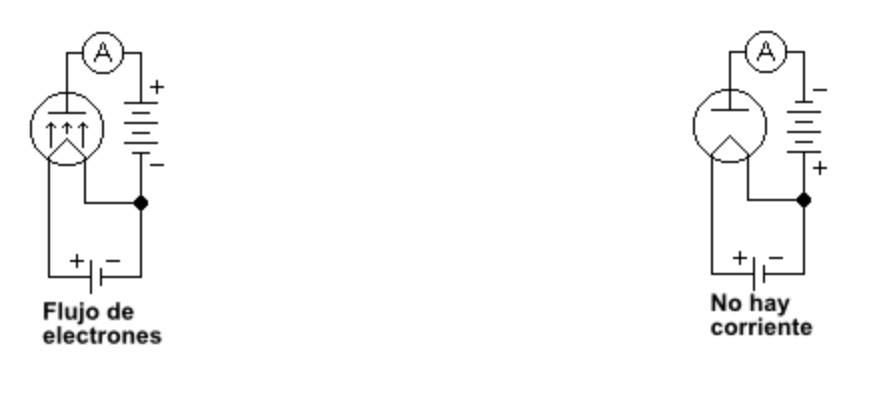

Como saben, las computadoras y los radios usaban antes bulbos. No se los dije la clase pasada, pero una de las grandes aplicaciones del efecto Richardson (o Termiónico) es que uno puede construir bulbos. Simplemente se tiene que cambiar el metal por el que pasa la corriente por una resistencia. Esta se calentará y hará que la electricidad fluya sólo si la batería está en la dirección correcta. Si ponen corriente alterna, este bulbo transformará esa corriente alterna en corriente directa. Los bulbos son entonces como diodos, pero mucho más grandes y mucho más costosos. Entender como se conduce la electrucidad en un material llevó a la teoría de bandas que finalmente ayudó a diseñar los diodos. 

Y pues conocen la historia. Del diodo se pasó a los circuitos integrados, que después se redujo a los transistores, microchips, etc... Y hoy hago esta presenación en mi compu gracias a eso. 

Ahora, voy a pasar a revisar un poco de la parte clásica. Como dije, vale la pena, porque por un lado lograron obtner bastante a pesar de no usar cuántica y por otro, hay experimentos con metamateriales formados con superconductores, cuya conductividad está muy bien aproximada con la versión clásica. 

Además, el modelo que se planteo llevó a un problema de teoría de caos que ha dado bastante trabajo a los matemáticos (y a mi), así que creo que vale la pena que se los platique. 

Por otro lado, aunque la versión clásica no resuelva bien el problema, da ideas de cómo controlar la temperatura. 

## Model de Drude y Lorentz (1904)

Como ya mencioné, Lorentz estaba trabajando en estos temas desde 1878, así que ya tenía algo de práctica en el tema. De Drude por otro lado al parecer era un geniesillo. Muy pronto logró puestos importantes y grandes reconocimientos. Pero un poco inexplicablemente, a la edad de 43 años se suicidó. 

Lorentz comenzó tratando de aplicar la termodinámica directamente a las ecuaciones de Maxwell. Drude en cambio planteó un modelo que después se apropió y extendió Lorentz. Pensar en los átomos construidos por nucleos muy pesados prácticamente fijos y electrones que no interactuaban entre ellos y libres. Un gas completamente ionizado. Los electrones se mueven tan rápido, que no interactuan entre ellos y para ellos los nucleos atómicos están fijos. Como los electrones son diminutos, se les considera partículas puntuales, mientras que los nucleos atómicos son esferas con las que colisionan los electrones: 

## Aportación de Drude

<img src="Drude_model.gif" width="620" align = "center"> 

In [54]:
using Plots
include("Lorentz.jl") 

global particulas = [Particula([-0.3,-0.3],[cos(π/4+θ), sin(π/4+θ)],1,0) for θ in -0.1:0.000522:0.1]
global discos = [Disco(0.05,[x,0]) for x in -1.9:0.2:1.9]
global paredes = [-2,2.02112312,-0.3,0.2678];

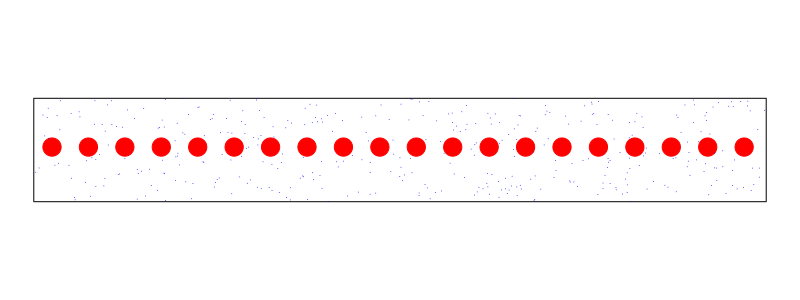

[ Info: Saved animation to C:\Users\ata0k\Clases FE\Drude_model.gif


Plots.AnimatedGif("C:\\Users\\ata0k\\Clases FE\\Drude_model.gif")
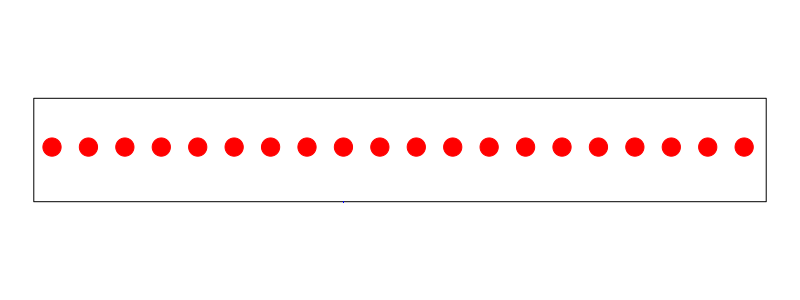

In [55]:
global particulas = [Particula([-0.3,-0.3],[cos(π/4+θ), sin(π/4+θ)],1,0) for θ in -0.1:0.000522:0.1]
anim = @animate for i in 1:500
    global particulas, discos, paredes
    t = 0.03
    plot(aspect_ratio = 1, key = false, grid = false, axis = false, ticks = false)
    for disco in discos
        plot!(disco, fill = true, color = :red)
    end
    plot!([paredes[1],paredes[2],paredes[2],paredes[1],paredes[1]], [paredes[3],paredes[3],paredes[4],paredes[4],paredes[3]], color = :black)
    for j in 1:length(particulas)
        scatter!([particulas[j].x[1]],[particulas[j].x[2]], color = :blue, ms = 0.5, markerstrokewidth = 0)
        particulas[j] = avanza_t(particulas[j], discos, t, paredes)
    end
    plot!(show = :ijulia, size = (800, 300))
end
gif(anim, "Drude_model.gif", fps = 10)

Ahora, si los electrones se mueven a velocidad $v_e$, entonces: 

$$j = \frac{N}{V} \langle v_e \rangle e$$

Por otro lado, según la ley de Ohm: 

$$j = \sigma E$$

donde $\sigma$ es la conductividad eléctrica. Comparando ambas ecuaciones llegamos a que: 

$$ \sigma  = \frac{N\langle v_e \rangle e}{V E}$$

Por otro lado: 

$$F = m_e a = e E$$

$$a \approx \frac{\langle v_e \rangle}{\tau}$$

donde $\tau$ es el tiempo medio entre colisión y colisión, que es también el tiempo que tarda en que el electrón se acelere hasta $2 \langle v_e \rangle$.  De aquí tenemos que: 

$$\frac{m_e \langle v_e \rangle}{\tau} \approx e E $$

$$\Rightarrow \frac{\langle v_e \rangle}{E} \approx \frac{e \tau}{m_e}$$

Lo que nos lleva a:

## Ecuación de Drude

$$ \sigma \approx \frac{N}{V} \frac{e^2 \tau}{m_e}$$

Esto ya nos da bastante información. La conductividad al final tiene que ver con la densidad de electrones y con el tiempo libre medio. También nos dice que si reducimos la longitud, del alambre, se incrementará la conductividad. No es de extrañarse, pero aquí hay una explicación de porque. 

Ahora tratemos de explicar porque hay una relación entre la conductividad térmica y la eléctrica!

## Contribución de Lorentz

El Modelo de Drude pasó a ser el modelo de Lorentz, pues Lorentz lo explotó e hizo famoso en realidad. Aunque luego en los años 60's un matemático Ruso de apellido Sinai propuso un modelo muy similar para dar un ejemplo de sistema caótico. Por eso entre los matemáticos se llama Billar de Sinai. Es justo los nombres que tienen, porque en realidad Drude no hizo mucho con la idea de poner partículas colisionando con discos. Lorentz hizo algo más y Sinai hizo realmente bastante, no sólo desde el punto de vista físico, sino también desde el punto de vista meramente matemático. De hecho en 2014 Sinai recibió el premio Abel por esos trabajos. 

Dicho esto, pasemos al problema de Lorentz. Lo que él quería hacer era relacionar la conductividad térmica y eléctrica y lo logró después de una muy larga talacha. La ídea básica fue obtener primero el $\tau$ de Drude en términos de la temperatura. Para esto notó que:

$$\frac{1}{2}m_e v_e ^2  =  \frac{3}{2}k_B T = \alpha T$$

$$ \langle v_e \rangle =  \int v \rho(\vec{v}, \vec{x})d^3vd^3x$$

$$ \langle E \rangle =  \frac{1}{2} m_ e\int v^2 \rho(\vec{v}, \vec{x})d^3vd^3x$$

Aquí usó la distribución de Maxwell-Boltzmann que vimos para un gas ideal:

$$\rho(\vec{x},\vec{p})d\vec{p}d\vec{x} = \frac{ e^{-\beta (p^2/2m + U(\vec{r}))} d\vec{p}d\vec{x}}{\int_V d\vec{x}\int\int\int_{-\infty}^\infty e^{-\beta (p^2/2m + U(\vec{r}))} d\vec{p}}$$

Y eligió el potencial asociado al campo eléctrico $E$ que produce el movimiento de los electrones en el metal se puede obtener el promedio de $v_e$ en términos de la temperatura, que a su vez se puede re-escribir en términos de $\langle v_e ^2\rangle$ vía la energía de un gas ideal. 

Por lo tanto, usando: 

$$ \sigma  = \frac{N\langle v_e \rangle e}{V E}$$


se llega a: 

$$ \sigma  =\sqrt{\frac{2}{3\pi}} \frac{l N e^2 \sqrt{\langle v_e^2\rangle} }{ \alpha T}$$

La talacha para llegar a ello es bastante larga, pero se puede llegar. Lo importante aquí es que se llega a una relación que va como $1/T$. 

Luego, para la conductividad térmica, lo que se requiere es calcular el flujo de energía por unidad de área. Otra vez, el problema es largo, así que no lo haré, pero Lorentz logró probar que: 

$$\kappa = \frac{8}{9}\sqrt{\frac{2}{3\pi}} l N \alpha \sqrt{\langle v_e^2\rangle}$$

De aquí obtuvo el cociente de ambas conductividades: 

$$\frac{\kappa}{\sigma} = \frac{8}{9}\Big(\frac{\alpha}{e}\Big)^2 T$$

Que pega excelentemente bien con los resultados experimentales. Sin embargo, a la hora de obtener $C_v$ se obtiene una constante, pues se trata de un gas ideal, pero como ya dijimos, los metales no tenían un comportamiento constante en su $C_v$. Una parte se podía explicar con el modelo de Debye (que veremos en video), pero cuando se medía el calor específico de los electrones únicamente, este seguía sin ser constante con respecto de la temperatura. Así que la teoría de Lorentz no terminaba de cuajar. 

## Algunos cálculos extra sobre el gas de electrones

Nuevamente pongo aquí el número de ocupación para el gas de Fermi: 

$$\langle n_r \rangle = \frac{g}{\exp(\beta(\epsilon_r -\mu))+1}$$

También vale la pena recordar que: 

$$N = \int_0^\infty \rho(\epsilon) n(\epsilon) d\epsilon$$ 

$$ = \frac{2\pi V (2s +1) (2m)^{3/2}}{h^3} \int_0^\infty \frac{\sqrt{\epsilon}d\epsilon}{\exp(\beta(\epsilon -\mu))+1} $$

$$=  \int_0^{\epsilon_F}\frac{\sqrt{\epsilon}d\epsilon}{\exp(\beta(\epsilon -\mu))+1}= \frac{8\pi V (2m \epsilon_F)^{3/2}}{3h^3}$$

$$ \epsilon_F = \eta^{2/3} \Big(\frac{3 h^3}{8\pi}\Big)^{2/3} \frac{1}{2m}$$

De donde obtuvimos el monento de Fermi: 

$$p_F = \Big(\frac{3\eta}{8\pi}\Big)^{1/3} h$$

Recuerden que aquí $\eta$ es la densidad de partículas $N/V$. 

Ahora, podemos obtener la energía total como: 

$$\langle E \rangle = E = \int_0^\infty \epsilon \rho(\epsilon) n(\epsilon) d\epsilon$$ 

En el caso de temperatura 0K o cercano podemos integrar sólo hasta la energía de Fermi y sustituir el potencial químico por la energía de Fermi, en cuyo caso nos queda: 

$$ = \Big(\frac{3}{8\pi}\Big)^{2/3} \frac{3N h^2}{10 m} \eta^{2/3} = \frac{3}{5} N \epsilon_F$$

Ahora, recordemos que para un gas ideal no relativista: 

$$E = \frac{3}{2} PV $$

De aquí podemos obtener cuanto es la presión de un gas de electrones: 

$$ P = \frac{2}{5} \eta \epsilon_F = \Big(\frac{3}{8\pi}\Big)^{2/3} \frac{2 h^2 \eta^{5/3}}{10m}$$

Que es diferente de 0 incluso a temperatura 0K. Hay presión en un gas de electrones incluso a temperatura 0!!! Recordemos que estamos considerando que es un gas ideal, es decir, las partículas no interactuan entre sí. Pero a pesar de ello hay una especie de "interacción" por el principio de exclusión de Pauli. También contrasta con los bosones, donde la presión sí se vuelve 0. 

Algo que también es importante mencionar es que la energía por partícula sigue una ley de potencia de la densidad de partículas, así que, al incrementar la densidad de un gas de electrones, estos incrementarán su energía cinética, lo que es equivalente a subir su temperatura y por lo tanto, se parecerá a un gas clásico (considerando la temperatura como la temperatura de Fermi y no la temperatura real).  

## Gas de fermi a bajas temperaturas

Antes aproximamos el gas de fermi a bajas temperaturas por un gas de fermi a temperatura 0. Es una buena primera aproximación, pero conviene hacer una mejora. 

Para esto regresemos a ver cómo se ve el número de ocupación:

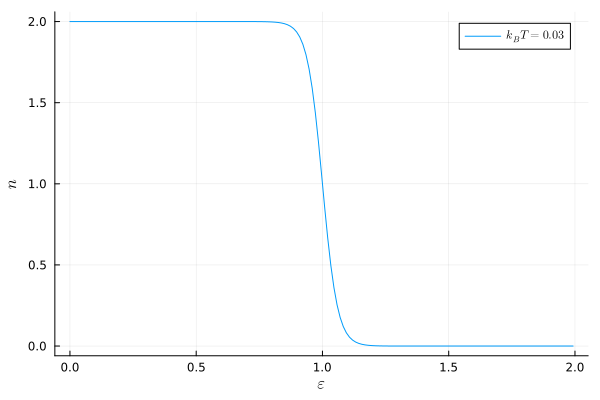

In [97]:
using LaTeXStrings, Plots
nr(ϵ, μ = 1, T = 0) = 2/(exp(1/T * (ϵ-μ))+1)
ϵs = 0:0.0123:2
plot(xlabel = L"\epsilon", ylabel = L"n")
T = 0.03
plot!(ϵs, nr.(ϵs, 1, T), label = L" k_BT = %$T")

plot!()

Y déjenme re-escribir el número de ocupación de la siguiente manera: 

$$\langle n_r \rangle = \frac{g}{\exp(\beta(\epsilon_r -\mu))+1}$$

$$ = g \frac{1}{\exp(\beta(\epsilon_r -\mu))+1} = g \frac{1}{e^x+1}$$

$$ = g \frac{1}{2}\Big(1- \tanh\Big(\frac{x}{2}\Big)\Big)$$

Derivar así es más fácil. Tenemos que: 

$$\frac{\partial \langle n \rangle }{\partial \epsilon} = \frac{\partial x}{\partial \epsilon} \frac{\partial\langle n \rangle}{\partial x} $$

La parcial de $x$ respecto de $\epsilon$ es simplemente $\beta$ y la parcial de $\langle n \rangle$ respecto de $x$ es: 

$$ = \frac{g}{k_B T}\Big(- \frac{1}{4\cosh^2(x/2)}\Big)$$

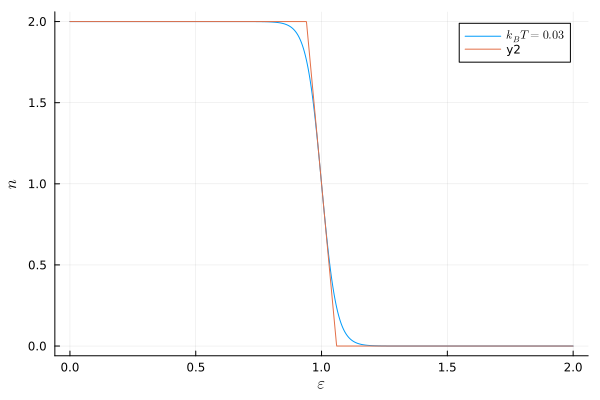

In [98]:
using LaTeXStrings, Plots
nr(ϵ, μ = 1, T = 0) = 2/(exp(1/T * (ϵ-μ))+1)
ϵs = 0:0.0011:2
plot(xlabel = L"\epsilon", ylabel = L"n")
T = 0.03
plot!(ϵs, nr.(ϵs, 1, T), label = L" k_BT = %$T")

m(T) = -1/(2T)
function y(x, T) 
    h = m(T)*(x-1) + 1
    if h> 2
        return 2
    elseif h<0
        return 0
    else
        return h
    end
end
plot!(ϵs, y.(ϵs, T))

Cambiamos de una función de Heaviside, a una que es casi de Heaviside, pero con una corrección. La idea es justamente hacer eso, aproximar el número de ocupación por una función de Heaviside + correcciones. Para esto necesitaremos un poco de variable compleja, así que les recordaré algunos resultados: 

### Recordatorio de Variable compleja: 

Si una función es analítica (o sea, se puede expresar en series de Taylor) dentro de un camino cerrado $C$ complejo, entonces la integral de circuito es $0$.

**Teorema de Cauchy-Goursat**

Sea $C$ un camino cerrado simple $z(t)$ con $a\le t\le b$. Si la función $f$ es analítica dentro del área delimitada por $C$, entonces

$$\int_C f(z) dz = \int_a^b f(z(t))z'(t) dt = 0$$

En el caso de que la función no sea analítica uno puede usar los residuos, que para explicar que son, primero necesito definir una serie de Laurent. 

### Serie de Laurent de $f$

$$f(z) = \sum_{n = 0}^\infty a_n (z-z_0)^n + \sum_{n = 1}^\infty \frac{b_{n}}{(z-z_0)^{n}}$$

En general podemos describir cualquier función con un número finito de puntos donde no es analítica la función con series de Laurent. Estas son como extensiones de las series de Taylor, donde la serie incluye términos negativos en los exponentes. 

Además, si $C$ es un camino cerrado al rededor de $z_0$ tal que a lo más $z_0$ es un punto no analítico de $f$, entonces: 

$$a_n = \frac{1}{2\pi i} \int_C \frac{f(z) dz}{(z-z_0)^{n+1}}$$

y

$$b_n = \frac{1}{2\pi i} \int_C \frac{f(z) dz}{(z-z_0)^{-n+1}}$$

Si la función es analítica al rededor de $z_0$, entonces los $b_0$ se vuelven $0$ y la serie se vuelve una serie de Taylor, pues los coeficientes $a_n$ se vuelven $f^{(n)}(z_0)/n!$. 

Los $b_n$ se conocen como los residuos de $f$ y se pueden usar para evaluar justamente esta integral:

**Teorema de los residuos de Cauchy** 

Si $C$ es un camino cerrado simple en sentido positivo y $f$ una función analítica en el interior de $C$ y en $C$ excepto en un conjunto de puntos singulares interiores a $C$, $z_k$ ($k = 1, 2, \dots, n$) , entonces: 

$$\int_C f(z) dz = 2\pi i \sum Res(f(z))$$

Así que lo único que necesitamos es encontrar los residuos, lo cual podemos hacer vía obtener de alguna forma alternativa la serie de Laurent. 

Esto lo podemos usar para evaluar integrales complicadas. Por ejemplo, digamos que tenemos: 

**Ejemplo. Evalua:**

$$ J(p) = \int_{-\infty}^\infty \frac{e^{ipx}}{(e^x + 1)(e^{-x}+1)} dx$$

hagamos $z = x$. La función tiene residuos en $z = i\pi$, pues $e^{i\pi} = -1$ según la ecuación de euler. Así que podemos seguir el siguiente circuito. 

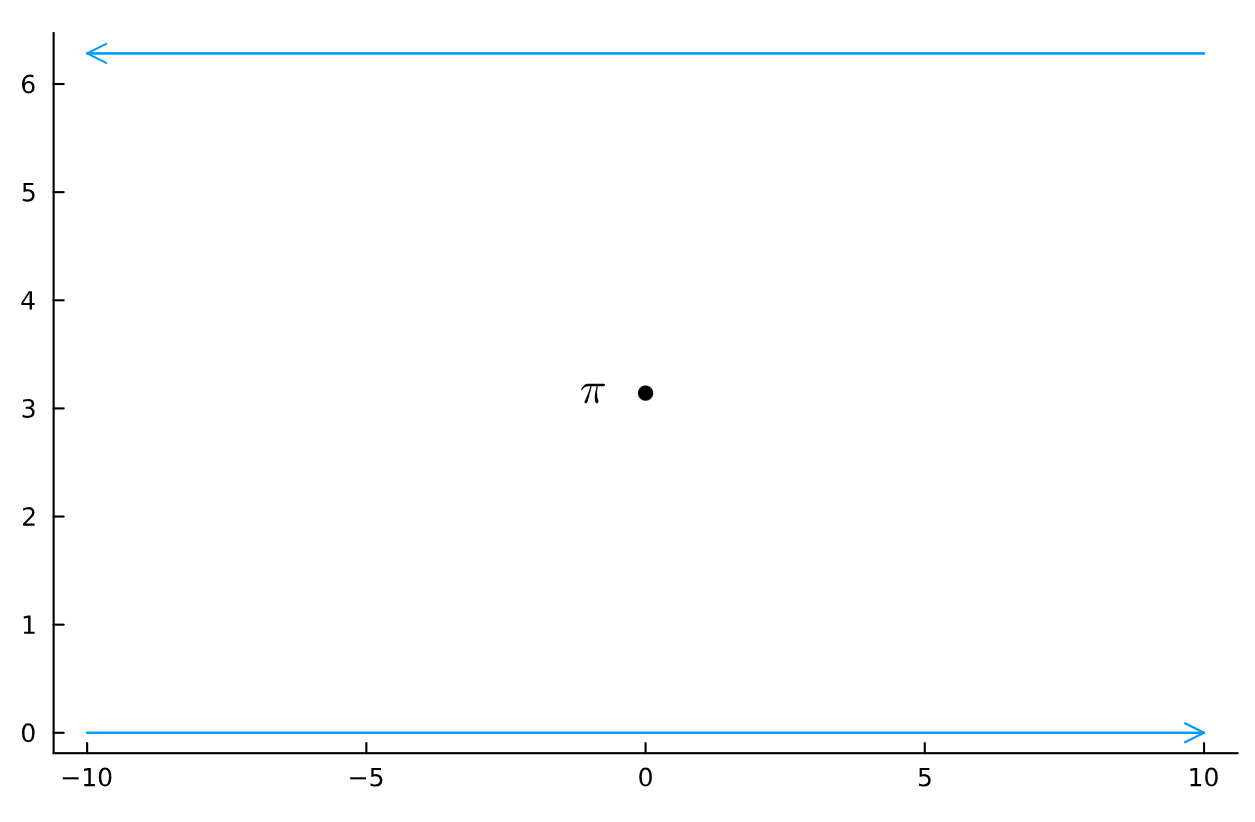

La parte de abajo, va de $-\infty$ a $\infty$ y $z$ es sólo reales, así que es exactamente la función que queremos evaliar. 

La parte de arriva va de $\infty$ a $-\infty$ y es la función que queremos evaluar recorrida a $z = x + 2i\pi$. Recorrerla implica que todas las exponenciales de abajo se multiplican por $e^{2i\pi} = 1$ y la de arriba se multiplica por $e^{-2\pi p}$. O lo que es igual: 

$$2\pi i \times Res(f(i\pi)) = \int_C f(z)dz = (1-e^{-2\pi p})J(p)$$

Por lo tanto: 

$$J(p) = \frac{2\pi i \times Res(f(i\pi))}{1-e^{-2\pi p}}$$

Para obtener el residuo usamos la siguiente propiedad: 

Si $f(z)$ tiene un cero en $z_0$, entonces 

$$ Res(1/f(z)) = \frac{1}{f'(z_0)}$$

con esa regla obtenemos que el residuo es $-i p e^{-\pi p}$. Por lo que:

$$Res(1/f(z)) = -i p e^{-\pi p}$$

$$J(p) = \frac{2\pi p }{e^{\pi p } - e^{-\pi p}} = \frac{\pi p}{\sinh(\pi p)}$$

## Aproximación de Sommerfeld

Queremos evaluar integrales del tipo: 

$$ I(\beta) = \int_0^\infty \frac{\phi'(\epsilon) d\epsilon }{e^{\beta(\epsilon - \mu)}+1}$$

donde $\phi(0) = 0$. Por lo tanto, integrando por partes tenemos que es: 

$$I(\beta) =  \beta \int_0^\infty \frac{\phi(\epsilon) e^{\beta(\epsilon - \mu)} d\epsilon }{(e^{\beta(\epsilon - \mu)}+1)^2}$$

Si asumimos que $\beta \mu >> 1$, podemos extender los límites de integración de $-\infty$ a $\infty$ con un error del orden de $\exp(-\beta\mu)$. 

$$I(\beta) =  \beta \int_{-\infty}^\infty \frac{\phi(\epsilon) e^{\beta(\epsilon - \mu)} d\epsilon }{(e^{\beta(\epsilon - \mu)}+1)^2}$$

Ahora expandimos en series de Taylor la función $\phi$. 

$$I(\beta) =  \beta \sum_{m = 0}^\infty \frac{\phi^{(m)}(\mu)}{m!} \int_{-\infty}^\infty \frac{(\epsilon-\mu)^m e^{\beta(\epsilon - \mu)} d\epsilon }{(e^{\beta(\epsilon - \mu)}+1)^2}$$

$$=   \sum_{m = 0}^\infty \frac{\phi^{(m)}(\mu)}{m!} \beta ^{-m} \int_{-\infty}^\infty \frac{x^m e^{x} d\epsilon }{(e^{x}+1)^2}$$

$$=   \sum_{m = 0}^\infty \frac{\phi^{(m)}(\mu)}{m!} \beta ^{-m} I_m$$

Pero: 

$$ J(p) = \int_{-\infty}^\infty \frac{e^{ipx}}{(e^x + 1)(e^{-x}+1)} dx = \sum_{m = 0}^\infty \frac{(i p)^m}{m!} I_m$$

que ya evaluamos en el ejemplo de las integrales vía residuos, sólo que en vez de $ip$ ahora tenemos $k_B T \phi^{(n)}$. La parte de $i$ no es importante, porque la integral sale real, así que la integral de sólo la parte real debe de ser lo que obtuvimos. Pero queda aún el detalle de cambiar las potencias por el grado de derivación, que se cumple por la regla de la cadena (la misma razón por la que podemos tratar las derivadas como fracciones). 

Entonces, haciendo el desarrollo de Taylor de $\pi p/ \sinh(\pi p)$ y sustituyendo $p$ por $k_B T \phi^{()}$ obtenemos: 

$$I(\beta) = \phi(\mu) + \frac{\pi^2}{6}(k_B T)^2 \phi''(\mu) + O((k_B T/\mu)^4)$$

Que sustituyendo la $\phi$ por la función de Heaviside tenemos: 

$$ n(\epsilon)/g = \theta(\mu-\epsilon)- \frac{\pi^2}{6}(k_B T)^2 \delta'(\mu-\epsilon) + O((k_BT)^4 \delta^{(3)}(\mu-\epsilon))$$

Que es la aproximación de Sommerfeld!!

## Evaluación de derivadas con respecto de $T$

Supongamos que tenemos la cantidad física: 

$$\Phi(T) = \int_0^\infty d\epsilon \rho(\epsilon) n(\epsilon) f(\epsilon)$$

donde $f$ es algúna función termodinámica que promediamos con $\rho$ y $n$. Omitiré por ahora la degeneración, para no cargar con la $g$. 

Entonces, sustituyendo la aproximación de Sommerfeld tenemos: 

$$\Phi(T) \approx \int_0^\mu d\epsilon \rho(\epsilon)f(\epsilon) + \frac{\pi^2}{6}k_B^2 T^2[\rho'(\mu)f(\mu)+ \rho(\mu)f'(\mu)]$$

Ahora derivamos con respecto de $T$. 

$$\frac{\partial \Phi}{\partial T} \approx \frac{\partial \mu}{\partial T}\rho(\epsilon_F)f(\epsilon_F) + \frac{\pi^2}{3}k_B^2 T \rho'(\epsilon_F) f(\epsilon_F)+\frac{\pi^2}{3}k_B^2 T \rho(\epsilon_F)f'(\epsilon_F)$$

Ahora, analisemos el caso simple $f(\epsilon) = 1$, es decir, donde $\Phi(T) = N$. En cuyo caso la derivada es 0 y por lo tanto: 

$$\frac{\partial \mu}{\partial T} \approx -\frac{\pi^2}{3} k_B^2 T \frac{\rho'(\epsilon_F)}{\rho(\epsilon_F)}$$

Que sustituyendo los valores de la $\rho$ y $\rho'$ 

$$\frac{\partial \mu}{\partial T} \approx  -\frac{\pi^2}{6\epsilon_F} k_B^2 T $$

Integrando y haciendo que $\mu(T = 0) = \epsilon_F$ obtenemos: 

$$ \mu(T)\approx  \epsilon_F \Big(1-\frac{\pi^2}{12}\frac{k_B^2 T^2}{\epsilon_F^2}\Big)$$

## Ejercicio (Tarea)

Ahora aplica la approximación de Sommerfeld a $f(\epsilon) = \epsilon$

En este caso $\Phi$ es la energía promedio, así que la derivada va a ser el calor específico. 

Primero notamos que sustituyendo la derivada de $\mu$ se cancelan los primeros términos de la derivada de $\Phi$ con respecto a $T$. Así que nos queda: 

$$\frac{\partial \Phi}{\partial T} \approx \frac{\pi^2}{3}k_B^2 T \rho(\epsilon_F)f'(\epsilon_F)$$

Después es sólo sustituir. $f' = 1$, así que sólo hay que sustituir $\rho(\epsilon_F)$. 

$$C_V = \frac{\pi^2}{3}k_B^2 T \rho(\epsilon_F) = N \frac{\pi^2 k_B^2 T}{2\epsilon_F}$$

Es decir, la capacidad calorífica de los metales por sus electrones libres cae linealmente con $T$. 

Videos (viejos) de Debye. 

https://youtu.be/VzJMwAF2MxI

https://youtu.be/Esx8Gsv1FvM

https://youtu.be/d-bzdSt4uN0

https://youtu.be/WgFF-StmZOw

No me convencen estos videos que hice hace tiempo, pero ya no tuve tiempo de preparar esa clase y sí quiero: 

1. El viernes tener la clase relajada.

2. El lunes comenzar con lo de Transiciones de Fase (y cosas del gran canónico que me gustaría ver también). 

Así que tendré que aguantar la vergüenza de una clase con algunos huecos!! Igual espero que sea suficientemente clara. 



### Con eso termina todo lo que se evaluará!! 

# Espero que hayan disfrutado el curso. 